In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

NUM_CLASSES = 8

CHANNELS = 3

IMAGE_RESIZE = 50

NUM_EPOCHS = 200

STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

BATCH_SIZE_TRAINING = 80
BATCH_SIZE_VALIDATION = 30

BATCH_SIZE_TESTING = 1



In [2]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, GlobalAveragePooling2D, LeakyReLU
from keras.models import Sequential
from keras import optimizers




from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = IMAGE_RESIZE

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        'dataset/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        'dataset/valid',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 



C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

Found 9348 images belonging to 8 classes.
Found 877 images belonging to 8 classes.


In [3]:
def conv_pool_cnn(dim=224,freeze_layers=10,full_freeze='N'):

  model = ResNet50(include_top=False)
  x = model.output
  x = GlobalAveragePooling2D()(x)
  
  model = Model(input = model.input,outputs=x)
  
  model_final = Sequential()
  model_final.add(model)
  
  model_final.add(Dense(2048))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.1))
  
  model_final.add(Dense(1024))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.1))
  
  model_final.add(Dense(512))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.2))
  
  model_final.add(Dense(256))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.2))
    
  model_final.add(Dense(128))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.2))

  model_final.add(Dense(8,activation='softmax'))
  
  model_final.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  
  
  if full_freeze != 'N':
    for layer in model.layers[0:freeze_layers]:
      layer.trainable = False
  model_final.summary()
  return model_final


In [4]:
model = conv_pool_cnn()

Instructions for updating:
Colocations handled automatically by placer.


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("gl..., inputs=Tensor("in...)`
  import sys


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
___________________________

In [5]:
(BATCH_SIZE_TRAINING, len(train_generator), BATCH_SIZE_VALIDATION, len(validation_generator))

fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION
)

model.save('model_resnet50.hdf5')

print(fit_history.history.keys())

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
10/10 [==============================] - 113s 11s/step - loss: 3.0451 - acc: 0.1737 - val_loss: 4.9631 - val_acc: 0.1733
Epoch 2/200
10/10 [==============================] - 98s 10s/step - loss: 2.7110 - acc: 0.2638 - val_loss: 5.1142 - val_acc: 0.3000
Epoch 3/200
10/10 [==============================] - 94s 9s/step - loss: 2.3151 - acc: 0.2987 - val_loss: 5.7306 - val_acc: 0.2780
Epoch 4/200
10/10 [==============================] - 92s 9s/step - loss: 2.1886 - acc: 0.3200 - val_loss: 5.2764 - val_acc: 0.3100
Epoch 5/200
10/10 [==============================] - 92s 9s/step - loss: 2.0394 - acc: 0.3487 - val_loss: 5.2255 - val_acc: 0.2833
Epoch 6/200
10/10 [==============================] - 90s 9s/step - loss: 2.0841 - acc: 0.3588 - val_loss: 4.3033 - val_acc: 0.3177
Epoch 7/200
10/10 [==============================] - 90s 9s/step - loss: 2.0754 - acc: 0.3987 - val_loss: 4.1848 - val_acc: 0.3600
Epoch 8/200
10/10 [=============

10/10 [==============================] - 90s 9s/step - loss: 1.8344 - acc: 0.3937 - val_loss: 6.6593 - val_acc: 0.2800
Epoch 62/200
10/10 [==============================] - 92s 9s/step - loss: 1.8079 - acc: 0.4188 - val_loss: 2.9494 - val_acc: 0.2767
Epoch 63/200
10/10 [==============================] - 90s 9s/step - loss: 1.8526 - acc: 0.4262 - val_loss: 2.6263 - val_acc: 0.3321
Epoch 64/200
10/10 [==============================] - 91s 9s/step - loss: 1.7979 - acc: 0.4000 - val_loss: 2.7188 - val_acc: 0.2767
Epoch 65/200
10/10 [==============================] - 90s 9s/step - loss: 1.7848 - acc: 0.4362 - val_loss: 1.8707 - val_acc: 0.3833
Epoch 66/200
10/10 [==============================] - 89s 9s/step - loss: 1.7091 - acc: 0.4363 - val_loss: 1.6871 - val_acc: 0.4440
Epoch 67/200
10/10 [==============================] - 90s 9s/step - loss: 1.6805 - acc: 0.4363 - val_loss: 1.6744 - val_acc: 0.3967
Epoch 68/200
10/10 [==============================] - 90s 9s/step - loss: 1.7267 - acc: 0

Epoch 123/200
10/10 [==============================] - 77s 8s/step - loss: 1.5292 - acc: 0.4913 - val_loss: 1.5946 - val_acc: 0.4404
Epoch 124/200
10/10 [==============================] - 74s 7s/step - loss: 1.5274 - acc: 0.4487 - val_loss: 1.4867 - val_acc: 0.4633
Epoch 125/200
10/10 [==============================] - 73s 7s/step - loss: 1.6160 - acc: 0.4588 - val_loss: 1.3387 - val_acc: 0.5300
Epoch 126/200
10/10 [==============================] - 73s 7s/step - loss: 1.6246 - acc: 0.4688 - val_loss: 1.4774 - val_acc: 0.4693
Epoch 127/200
10/10 [==============================] - 74s 7s/step - loss: 1.6564 - acc: 0.4462 - val_loss: 1.4854 - val_acc: 0.4400
Epoch 128/200
10/10 [==============================] - 74s 7s/step - loss: 1.6473 - acc: 0.4712 - val_loss: 1.4296 - val_acc: 0.4967
Epoch 129/200
10/10 [==============================] - 72s 7s/step - loss: 1.4898 - acc: 0.4875 - val_loss: 1.3934 - val_acc: 0.5126
Epoch 130/200
10/10 [==============================] - 73s 7s/step - 

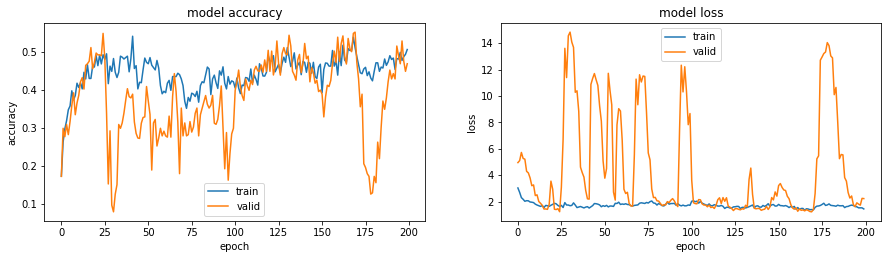

In [6]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['acc'])  
plt.plot(fit_history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.savefig("acc.png")
#plt.show()



In [8]:
test_generator = data_generator.flow_from_directory(
    directory = 'dataset/valid',
    target_size = (image_size, image_size),
    batch_size = BATCH_SIZE_TESTING,
    class_mode = None,
    shuffle = False,
    seed = 123
)

test_generator.reset()

pred = model.predict_generator(test_generator, steps = len(test_generator), verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)

print(predicted_class_indices)

Found 877 images belonging to 8 classes.
877/877 [==============================] - 33s 37ms/step
[0 5 5 0 0 0 0 5 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0 2 7 0 0 5
 0 0 0 0 0 0 0 0 2 0 0 5 5 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 5 5 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 0 5 0 0 0 0 5 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 2 0 0 5 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2
 5 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 7 2 2 2 2 2 2 2 2 2 7 7 2 2 2 2 5 2
 2 2 2 2 2 5 2 5 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 0 2 2 2 5 2 2 2 5 0 2
 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 5 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 7 2 2 2 5 5 5 2 2 7 2 2 2 2 5 7 7 0 0 2 2
 2 2 2 2 2 7 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2

In [9]:
print(test_generator.class_indices)

{'age_0_3': 0, 'age_15_20': 1, 'age_25_32': 2, 'age_34_48': 3, 'age_49_58': 4, 'age_4_6': 5, 'age_60_100': 6, 'age_8_12': 7}


In [1]:
#print(model.predict('girl.jpg'))

In [17]:
if os.path.exists('{}<.meta'.format("model_resnet50.hdf5")):
        model.load("model_resnet50.hdf5")
        print('model loaded!')